<a href="https://colab.research.google.com/github/galaxy-kim/Python_note_backup/blob/main/googletrend_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## 구글 트렌드 검색 데이터

In [ ]:
gt=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/와우패스 분석용 데이터 수집/multiTimeline.csv")
gt

,카테고리: 모든 카테고리
월,와우패스: (대한민국)
2004-01,0
2004-02,0
2004-03,100
2004-04,16
...,...
2022-12,<1
2023-01,1
2023-02,<1
2023-03,<1


In [ ]:
gt=gt.reset_index()
gt

,index,카테고리: 모든 카테고리
0,월,와우패스: (대한민국)
1,2004-01,0
2,2004-02,0
3,2004-03,100
4,2004-04,16
...,...,...
228,2022-12,<1
229,2023-01,1
230,2023-02,<1
231,2023-03,<1


In [ ]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          233 non-null    object
 1   카테고리: 모든 카테고리  233 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [ ]:
gt=gt.drop(index=0)
gt

,index,카테고리: 모든 카테고리
1,2004-01,0
2,2004-02,0
3,2004-03,100
4,2004-04,16
5,2004-05,0
...,...,...
228,2022-12,<1
229,2023-01,1
230,2023-02,<1
231,2023-03,<1


In [ ]:
gt.columns=['연월','검색량']
gt

,연월,검색량
1,2004-01,0
2,2004-02,0
3,2004-03,100
4,2004-04,16
5,2004-05,0
...,...,...
228,2022-12,<1
229,2023-01,1
230,2023-02,<1
231,2023-03,<1


In [ ]:
gt['연월']=pd.to_datetime(gt['연월'])
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 1 to 232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연월      232 non-null    datetime64[ns]
 1   검색량     232 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.8+ KB


In [ ]:
gt['검색량']=gt['검색량'].str.replace('<', '0.5').astype(float)

In [ ]:
grouped = gt.groupby(gt['연월'].dt.year)
sum_by_year = grouped['검색량'].sum()


In [ ]:
sum_by_year

연월
2004    129.00
2005     62.00
2006     23.00
2007      9.00
2008     22.00
2009     26.00
2010     41.00
2011     24.00
2012     20.00
2013      7.00
2014      8.51
2015     11.02
2016      5.55
2017      6.06
2018      8.04
2019      9.06
2020     12.00
2021     11.53
2022     10.04
2023      3.02
Name: 검색량, dtype: float64

In [ ]:
count_by_year=grouped['검색량'].count()
count_by_year

연월
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2022    12
2023     4
Name: 검색량, dtype: int64

In [ ]:
# create a dictionary of data frames, where each key corresponds to a year
dfs = {year: group[['연월', '검색량']] for year, group in grouped}


In [ ]:
# print the data frames for each year
for year, df_year in dfs.items():
    print(f"Data frame for year {year}:")
    print(df_year)
    print()

Data frame for year 2004:
           연월  검색량
1  2004-01-01    0
2  2004-02-01    0
3  2004-03-01  100
4  2004-04-01   16
5  2004-05-01    0
6  2004-06-01    0
7  2004-07-01   13
8  2004-08-01    0
9  2004-09-01    0
10 2004-10-01    0
11 2004-11-01    0
12 2004-12-01    0

Data frame for year 2005:
           연월 검색량
13 2005-01-01   0
14 2005-02-01  13
15 2005-03-01   0
16 2005-04-01   0
17 2005-05-01   0
18 2005-06-01   0
19 2005-07-01  20
20 2005-08-01   9
21 2005-09-01   0
22 2005-10-01   0
23 2005-11-01   0
24 2005-12-01  20

Data frame for year 2006:
           연월 검색량
25 2006-01-01   0
26 2006-02-01   0
27 2006-03-01   0
28 2006-04-01   0
29 2006-05-01   0
30 2006-06-01   0
31 2006-07-01   0
32 2006-08-01   0
33 2006-09-01  16
34 2006-10-01   7
35 2006-11-01   0
36 2006-12-01   0

Data frame for year 2007:
           연월 검색량
37 2007-01-01   0
38 2007-02-01   0
39 2007-03-01   0
40 2007-04-01   0
41 2007-05-01   3
42 2007-06-01   0
43 2007-07-01   6
44 2007-08-01   0
45 2007-09-01   

In [ ]:
import matplotlib.pyplot as plt


## 네이버랩 검색 데이터

In [ ]:
ns=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/와우패스 분석용 데이터 수집/datalab_와우패스.xlsx")
ns

,연월,검색량
0,2016-01-01,100.00000
1,2016-02-01,81.02886
2,2016-03-01,95.15331
3,2016-04-01,80.47849
4,2016-05-01,57.48062
...,...,...
82,2022-11-01,20.81882
83,2022-12-01,19.12276
84,2023-01-01,26.86734
85,2023-02-01,26.12040


In [ ]:
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연월      87 non-null     object 
 1   검색량     87 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [ ]:
ns['연월']=pd.to_datetime(ns['연월'])

In [ ]:
grouped2 = ns.groupby(ns['연월'].dt.year)
sum_by_year2 = grouped2['검색량'].sum()


In [ ]:
sum_by_year2

연월
2016    876.35060
2017    668.65657
2018    609.85617
2019    639.30131
2020    591.90717
2021    419.98196
2022    291.79484
2023     81.36581
Name: 검색량, dtype: float64

###시각화

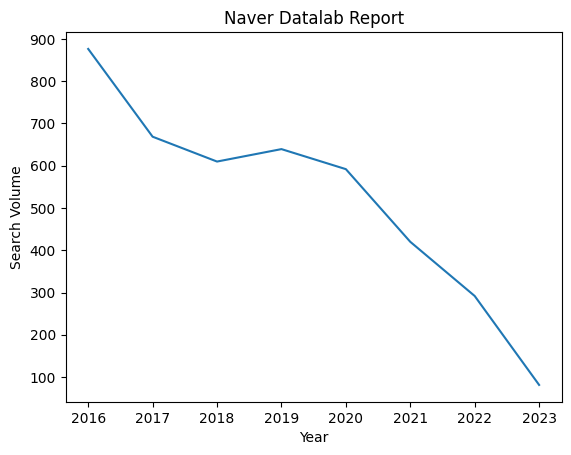

In [ ]:
# create a line plot of the series
plt.plot(sum_by_year2)

# add a title and axis labels
plt.title("Naver Datalab Report")
plt.xlabel("Year")
plt.ylabel("Search Volume")

# display the plot
plt.show()

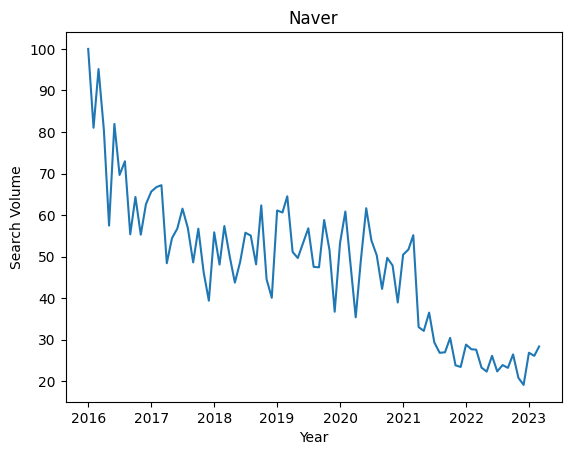

In [ ]:
# plot the data as a line chart
plt.plot(ns['연월'], ns['검색량'])

# add labels and title to the chart
plt.xlabel('Year')
plt.ylabel('Search Volume')
plt.title('Naver')

# show the chart
plt.show()

In [ ]:
sum_by_year

연월
2004    129.00
2005     62.00
2006     23.00
2007      9.00
2008     22.00
2009     26.00
2010     41.00
2011     24.00
2012     20.00
2013      7.00
2014      8.51
2015     11.02
2016      5.55
2017      6.06
2018      8.04
2019      9.06
2020     12.00
2021     11.53
2022     10.04
2023      3.02
Name: 검색량, dtype: float64

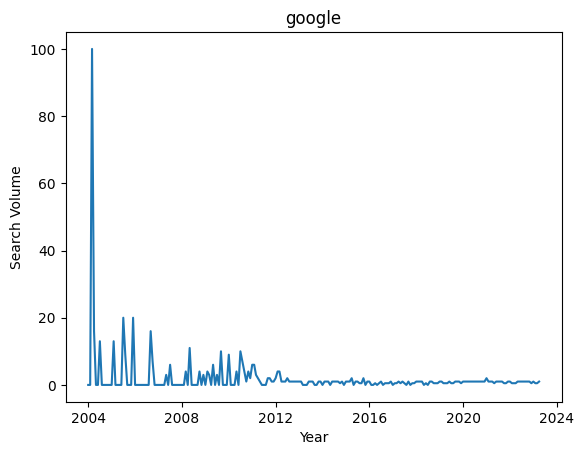

In [ ]:
# plot the data as a line chart
plt.plot(gt['연월'], gt['검색량'])

# add labels and title to the chart
plt.xlabel('Year')
plt.ylabel('Search Volume')
plt.title('google')

# show the chart
plt.show()

In [ ]:
sum_by_year.info()

<class 'pandas.core.series.Series'>
Int64Index: 20 entries, 2004 to 2023
Series name: 검색량
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


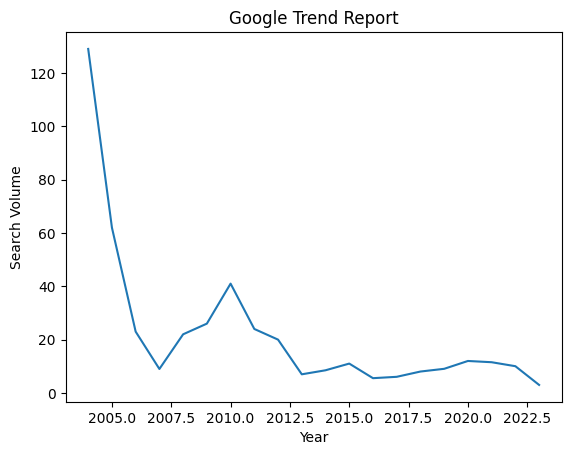

In [ ]:
# create a line plot of the series
plt.plot(sum_by_year)

# add a title and axis labels
plt.title("Google Trend Report")
plt.xlabel("Year")
plt.ylabel("Search Volume")

# display the plot
plt.show()

## 다른 거 할 수 있으니 일단

In [ ]:
gm=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/와우패스 분석용 데이터 수집/geoMap.csv")
gm

,카테고리: 모든 카테고리
지역,와우패스: (04. 1. 1.~23. 4. 29.)
경기도,100
서울특별시,96
대구광역시,NaN
울산광역시,NaN
부산광역시,NaN
제주특별자치도,NaN
전라북도,NaN
인천광역시,NaN
경상남도,NaN
